# Lecture 5, Damped Driven Pendulum and Chaos

**Overview:**
* Non-Linear Pendulum
* Damped & Driven non-linear pendulum
* Chaotic vs. Stochastic trajectories
* Sensitivity to initial conditions
* Phase space plots

---

In [16]:
# Keep import statement in their own cell at the top
import matplotlib.pyplot as plt # for plotting          
import numpy as np

# import our Pendulum class from Particle1D
from Particle1D import Pendulum
%matplotlib inline   

Below we will explore the behavior of a driven non-linear pendulum using our ODE class. The Pendulum class is a sub-class of Particle. There are some modifications to fix the range of the pendulum displacement $\theta: [-\pi, \pi]$. 

When creating a new instance of Pendulum, we can provide many arguments that describe a driven damped oscillator:

        P = Pendulum(l = 9.8, nu = 0, Fd  = 0.0, omega_d = 0.0, m = 1.0, x0 = 0.0 ,v0 = 0.0, tf = 50.0, dt = 0.001)
        
        l: length of pendulum
        nu: damping (viscous drag) term
        Fd: amplitude of driving force
        omega_d: frequency of driving force
        m: mass of pendulum
        x0: initial displacement
        v0: initial velocity
        tf: final time for our calculation
        dt: time step size

## The non-Linear pendulum

* Make sure you understand how the code below is working.
* Try modifying the code to add a damping term. Explore trajectories for different values of the damping coefficient.
* What do you notice about the shape of the trajectory as the driving force is increased?

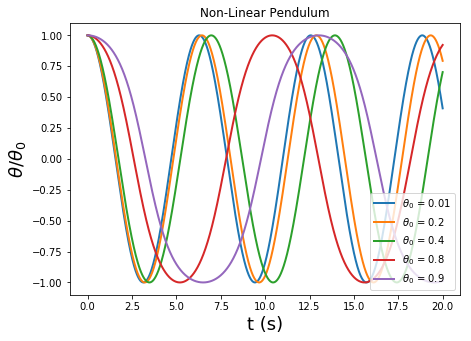

In [2]:
fig = plt.figure(figsize = [7,5])
ax = fig.add_subplot(111)
    
# Loop over different initial displacements and plot angle vs time for driven pendulum
    
# maximum initial displacement is 1, corresponds to pi radians.
x0s= [0.01, 0.2, 0.4, 0.8, 0.9] 

for x0 in x0s:
    p = Pendulum(nu = 0, x0 = np.pi*x0, tf= 20, dt = 1e-3)
    p.scipy_trajectory() #Use scipy ODEint 
    ax.plot(p.tarray, p.xv[:,0]/x0/np.pi, lw = 2, label = "$\\theta_0$ = {}".format(x0))

ax.set_xlabel('t (s)',fontsize = 18)
ax.set_ylabel('$\\theta / \\theta_0$', fontsize = 18)
ax.legend(loc = 4)
ax.set_title('Non-Linear Pendulum')
plt.show()


## Damped & Driven non-linear pendulum

Below we explore the behavior of the damped driven pendulum for different driving force amplitudes. 
* Try changing the frequency of the driving force or the damping coefficient. What do you notice? 

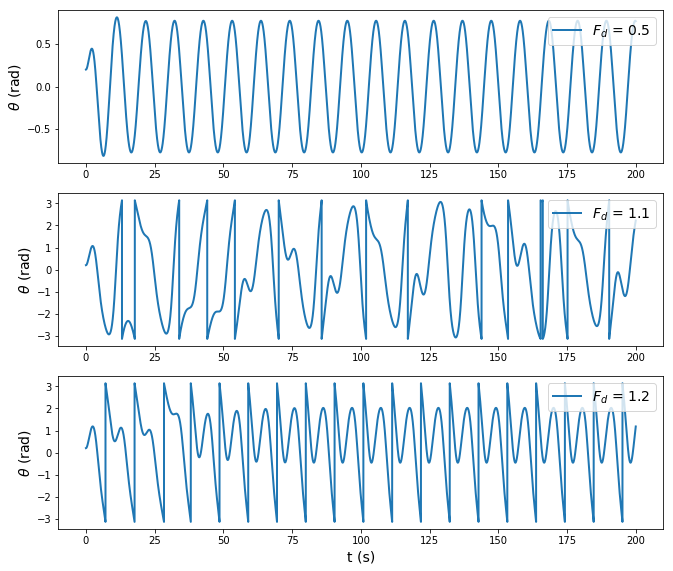

In [3]:
# demonstate regime of chaotic behavior
fig = plt.figure(figsize = [10,8])
axs = fig.subplots(3,1)
    

# Loop over driving force amplitudes
Fds = [0.5,1.1,1.2] 

for ii in range(len(Fds)):
    p = Pendulum(nu = 1/2, Fd = Fds[ii], omega_d = 0.6 , x0 = 0.200, tf = 200)
    p.scipy_trajectory()

    axs[ii].plot(p.tarray, p.xv[:,0],lw = 2, label = "$F_d$ = {}".format(Fds[ii]))
    axs[ii].set_ylabel('$\\theta$ (rad)', fontsize = 14)
    axs[ii].legend(loc = 1, fontsize = 14)
        

axs[-1].set_xlabel('t (s)', fontsize = 14) 
fig.subplots_adjust(top = 0.98, bottom =0.08, left = 0.14, right =0.98)



## Non deterministic (stochastic) vs. chaotic behavior

Below we explore the difference between chaotic and non-deterministic behavior by comparing our damped driven pendulum in the chaotic regime with randomly generated displacements. The random displacements might be a simulation of an extremely light pendulum sitting at equilibrium in a thermal bath.

* Try running the code below many times and each time examine the output. What do you notice about the stochastic trajectory vs. the chaotic trajectory?

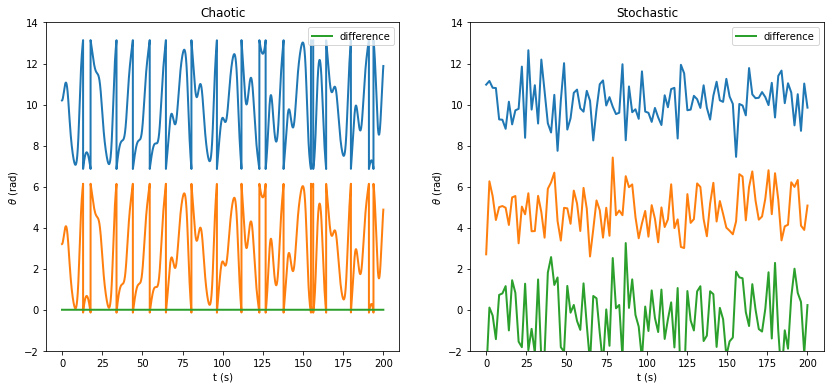

In [4]:
def white_noise(tf, dt):
    # function to simulate a stochastic or random process
    mean = 0
    std = np.pi/3.
    npoints = int(tf/dt)
    tarray = np.linspace(0.0, tf,npoints, endpoint = True) # include final timepoint
    
    # extract points at random from a normal distribution
    w = np.random.normal(mean, std, size = npoints)

    return tarray, w


fig = plt.figure(figsize = [12,6])
axs = fig.subplots(1,2)

# Create two different pendulum objects with the same parameters
p1 = Pendulum(nu = 1/2, Fd = 1.1, omega_d = 0.6 , x0 = 0.200, tf = 200, dt = 0.01)
p2 = Pendulum(nu = 1/2, Fd = 1.1, omega_d = 0.6 , x0 = 0.200, tf = 200, dt = 0.01)
p1.scipy_trajectory()
p2.scipy_trajectory()

# Create two different random "pendulums" with the same parameters
w1 = white_noise(tf = 200, dt =2)
w2 = white_noise(tf = 200, dt =2)

# Plot the trajectories and differences on the same graph
axs[0].plot(p1.tarray, p1.xv[:,0]+10,lw = 2)
axs[0].plot(p2.tarray, p2.xv[:,0]+3,lw = 2)
axs[0].plot(p2.tarray, p1.xv[:,0] - p2.xv[:,0],lw = 2, label = 'difference')
    
axs[0].set_ylim([-2,14])
axs[0].legend(loc = 1)
axs[0].set_xlabel('t (s)')
axs[0].set_ylabel('$\\theta$ (rad)')   

axs[1].plot(w2[0], w2[1]+10,lw = 2)
axs[1].plot(w1[0], w1[1]+5,lw = 2)
axs[1].plot(w1[0], w1[1] - w2[1],lw = 2, label = 'difference')

axs[1].set_ylabel('$\\theta$ (rad)')
axs[1].set_ylim([-2,14])
axs[1].legend(loc = 1)
axs[1].set_xlabel('t (s)')

axs[0].set_title('Chaotic')
axs[1].set_title('Stochastic')

fig.subplots_adjust(top = 0.9, bottom =0.14, left = 0.08, right =0.98)


## Dependence on Initial conditions

* Find a driving force amplitude where the trajectories for infinitesimally different initial $\theta$ are exponentially diverging.

* Make the difference in initial conditions as small as you please. Can you make it small enough so that the two trajectories are the same?

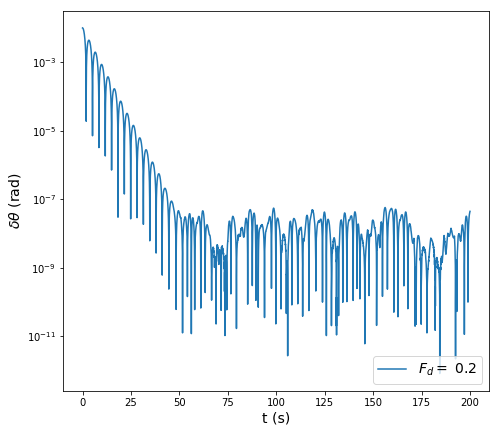

In [5]:
# Driving force amplitude
Fd = 0.2

# Initial theta
theta0 = 0.2

# Difference in initial position
delta_theta0 = 0.01


tf = 200
dt = 0.01

# Initialize objects and calculate trajectories
p1 = Pendulum(nu = 1/2, Fd = Fd, omega_d = 0.6 , x0 = theta0, tf = tf, dt = dt)
p2 = Pendulum(nu = 1/2, Fd = Fd, omega_d = 0.6 , x0 = theta0+delta_theta0, tf = tf, dt = dt)
p1.scipy_trajectory()
p2.scipy_trajectory()

# difference between two directorys
delta_theta = np.abs(p1.xv_unwrap[:,0] - p2.xv_unwrap[:,0])

# Make Plot    
fig = plt.figure(figsize = [8,6])
ax = fig.subplots(1,1)

# plot on a log scale
ax.semilogy(p1.tarray, delta_theta, label = "$F_d =$ {}".format(Fd))

ax.set_ylabel('$\delta \\theta$ (rad)', fontsize = 14)
ax.set_xlabel('t (s)', fontsize = 14)
ax.legend(loc = 4, fontsize = 14)
    
fig.subplots_adjust(top = 0.96, bottom =0.08, left = 0.24, right =0.98)
plt.show()


## Phase space plots

* Explore the phase space plots for different values of driving force amplitude. Can you tell when there is a chaotic solution?
* Can you generate a Poincare section? (sample only those points in phase space that occur at integer multiples of driving force frequency)

NameError: name 'ax2' is not defined

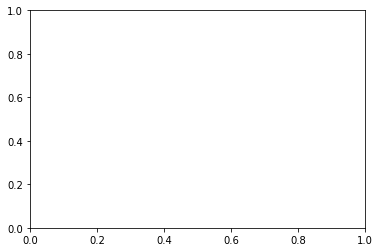

In [17]:
Fd = 0.2
theta0 = 0.2
tf = 1000
dt = 0.01

# Initialize objects and calculate trajectories
p1 = Pendulum(nu = 1/2, Fd = Fd, omega_d = 0.6 , x0 = theta0, tf = tf, dt = dt)
p1.scipy_trajectory()
p1.plot(pt = 'phase')